In [1]:
%matplotlib inline


=========================================================
Pipelining: chaining a PCA and a logistic regression
=========================================================

The PCA does an unsupervised dimensionality reduction, while the logistic
regression does the prediction.

We use a GridSearchCV to set the dimensionality of the PCA



In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

Automatically created module for IPython interactive environment


Plot the PCA spectrum


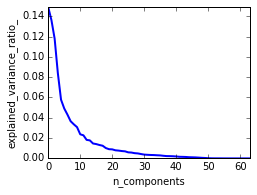

In [3]:
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Prediction


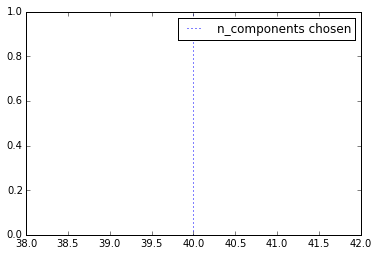

In [4]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [5]:
sorted(estimator.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_logistic__C',
 'param_pca__n_components',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [9]:
print(estimator.cv_results_)

{'std_train_score': array([ 0.00635134,  0.00515636,  0.00567639,  0.00181507,  0.00116574,
        0.0006918 ,  0.00240656,  0.00039399,  0.        ]), 'rank_test_score': array([9, 7, 8, 3, 1, 2, 4, 5, 6], dtype=int32), 'mean_score_time': array([ 0.00081205,  0.00078233,  0.00086737,  0.00079568,  0.00085966,
        0.0008293 ,  0.00073536,  0.00080697,  0.001007  ]), 'param_pca__n_components': masked_array(data = [20 40 64 20 40 64 20 40 64],
             mask = [False False False False False False False False False],
       fill_value = ?)
, 'std_test_score': array([ 0.00801541,  0.00612248,  0.00559584,  0.00658545,  0.01577153,
        0.01965211,  0.00391254,  0.02677113,  0.02293259]), 'split1_train_score': array([ 0.91986644,  0.92737896,  0.92737896,  0.96661102,  0.98998331,
        0.99499165,  0.97913189,  0.99916528,  1.        ]), 'split0_test_score': array([ 0.88538206,  0.89368771,  0.89202658,  0.92358804,  0.910299  ,
        0.90863787,  0.8986711 ,  0.86710963,  0.

In [5]:
print estimator.cv_results_.get('mean_test_score')

[ 0.87590428  0.88759043  0.88703395  0.91652755  0.92264886  0.91764051
  0.90539789  0.90261547  0.89538119]
